### Loading packages

In [2]:
install.packages(c("tidyverse", "lubridate", "skimr", "janitor", "rfm"))

# Notwendige Pakete laden
library(tidyverse)    # für Datenmanipulation und Visualisierung
library(lubridate)    # für Datumsfunktionen
library(skimr)        # für schnellen Datenüberblick
library(janitor)      # zur Säuberung der Spaltennamen
library(knitr)        # für die Erstellung von Tabellen
library(rfm)          # für RFM-Analyse
library(dplyr)        # für Datenmanipulation
library(tidyr)        # für Datenumformung
library(purrr)        # für funktionale Programmierung


Installiere Pakete nach 'C:/Users/danie/AppData/Local/R/win-library/4.4'
(da 'lib' nicht spezifiziert)



Paket 'tidyverse' erfolgreich ausgepackt und MD5 Summen abgeglichen
Paket 'lubridate' erfolgreich ausgepackt und MD5 Summen abgeglichen


Warning message:
"kann alte Installation von Paket 'lubridate' nicht entfernen"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\Users\danie\AppData\Local\R\win-library\4.4\00LOCK\lubridate\libs\x64\lubridate.dll nach C:\Users\danie\AppData\Local\R\win-library\4.4\lubridate\libs\x64\lubridate.dll zu kopieren: Permission denied"
Warning message:
"'lubridate' wiederhergestellt"


Paket 'skimr' erfolgreich ausgepackt und MD5 Summen abgeglichen
Paket 'janitor' erfolgreich ausgepackt und MD5 Summen abgeglichen
Paket 'rfm' erfolgreich ausgepackt und MD5 Summen abgeglichen

Die heruntergeladenen Binärpakete sind in 
	C:\Users\danie\AppData\Local\Temp\RtmpQvaWQB\downloaded_packages


Warning message:
"Paket 'tidyverse' wurde unter R Version 4.4.3 erstellt"
Warning message:
"Paket 'tidyr' wurde unter R Version 4.4.3 erstellt"
Warning message:
"Paket 'readr' wurde unter R Version 4.4.3 erstellt"
Warning message:
"Paket 'dplyr' wurde unter R Version 4.4.3 erstellt"
Warning message:
"Paket 'forcats' wurde unter R Version 4.4.3 erstellt"
Warning message:
"Paket 'lubridate' wurde unter R Version 4.4.3 erstellt"
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Warning message:
"Paket 'skimr' wurde unter R 

In [3]:
# CSV-Datei einlesen
df <- read_csv("../synthetic_beverage_sales_data.csv") %>%
  clean_names()

Rows: 8999910 Columns: 11
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (6): Order_ID, Customer_ID, Customer_Type, Product, Category, Region
dbl  (4): Unit_Price, Quantity, Discount, Total_Price
date (1): Order_Date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [4]:
head(df, 4) # print first 4 rows of data frame
glimpse(df) # print summary of data frame

order_id,customer_id,customer_type,product,category,unit_price,quantity,discount,total_price,region,order_date
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<date>
ORD1,CUS1496,B2B,Vio Wasser,Water,1.66,53,0.10,79.18,Baden-Württemberg,2023-08-23
ORD1,CUS1496,B2B,Evian,Water,1.56,90,0.10,126.36,Baden-Württemberg,2023-08-23
ORD1,CUS1496,B2B,Sprite,Soft Drinks,1.17,73,0.05,81.14,Baden-Württemberg,2023-08-23
ORD1,CUS1496,B2B,Rauch Multivitamin,Juices,3.22,59,0.10,170.98,Baden-Württemberg,2023-08-23


Rows: 8,999,910
Columns: 11
$ order_id      <chr> "ORD1", "ORD1", "ORD1", "ORD1", "ORD1", "ORD2", "ORD3", …
$ customer_id   <chr> "CUS1496", "CUS1496", "CUS1496", "CUS1496", "CUS1496", "…
$ customer_type <chr> "B2B", "B2B", "B2B", "B2B", "B2B", "B2C", "B2B", "B2B", …
$ product       <chr> "Vio Wasser", "Evian", "Sprite", "Rauch Multivitamin", "…
$ category      <chr> "Water", "Water", "Soft Drinks", "Juices", "Water", "Alc…
$ unit_price    <dbl> 1.66, 1.56, 1.17, 3.22, 0.87, 9.09, 2.14, 0.43, 1.21, 1.…
$ quantity      <dbl> 53, 90, 73, 59, 35, 2, 44, 13, 92, 3, 11, 8, 16, 3, 43, …
$ discount      <dbl> 0.10, 0.10, 0.05, 0.10, 0.10, 0.00, 0.10, 0.05, 0.10, 0.…
$ total_price   <dbl> 79.18, 126.36, 81.14, 170.98, 27.40, 18.18, 84.74, 5.31,…
$ region        <chr> "Baden-Württemberg", "Baden-Württemberg", "Baden-Württem…
$ order_date    <date> 2023-08-23, 2023-08-23, 2023-08-23, 2023-08-23, 2023-08…


# Data preperation

In [5]:
df[df == ""] <- NA # Ersetze leere Strings ("") durch NA
colSums(is.na(df)) # Zeigt dir, wie viele NAs pro Spalte vorhanden sind


order_id   customer_id customer_type       product      category 
            0             0             0             0             0 
   unit_price      quantity      discount   total_price        region 
            0             0             0             0             0 
   order_date 
            0

In [6]:
# Doppelte Einträge prüfen
# sum(duplicated(df))
# das dauert länger als 30min, deswegen abgebrochen

In [7]:
# Count rows with invalid or implausible values in key numeric columns
df %>%
  filter(
    unit_price <= 0 |         # Unit price should be greater than 0
    quantity <= 0 |           # Quantity should be greater than 0
    discount < 0 | discount > 1 |  # Discount must be between 0 and 1
    total_price < 0           # Total price should not be negative
  ) %>%
  nrow()  # Count the number of rows that meet any of the above conditions


[1] 0

# Splitting into B2B and B2C & grouping into different dataframes
### line-wise, rfm-base, numeric-invoice-wise, full-invoice-wise

In [8]:
# Aufteilen in B2B und B2C
# Hier ist jede Zeile ein Kauf eines Kunden von einem Produkt (Stückzahl egal), der Kunde kann also mehrere Produkte pro Tag gekauft haben, es sind aber alles verschiedene Zeilen
# Wir nennen das line-item level, weil es eine Zeile pro Produkt ist. Gut zu erkennen dass mehrere zeilen für eine order_id existieren

line_wise_b2b <- df %>% filter(customer_type == "B2B")
line_wise_b2c <- df %>% filter(customer_type == "B2C")

# Aggregate data to one row per order per customer 

# Für RFM, übergibt nur customer_id, order_date und revenue
# For B2B customers
rfm_base_b2b <- line_wise_b2b %>%
  group_by(customer_id, order_date) %>%                  # Group by customer and order date 
  summarise(total_price = sum(total_price, na.rm = TRUE),    # Sum total revenue per order (in case multiple products were ordered)
  .groups = "drop"
)
# For B2C customers
rfm_base_b2c <- line_wise_b2c %>%
  group_by(customer_id, order_date) %>%                  # Same logic for B2C customers
  summarise(total_price = sum(total_price, na.rm = TRUE),
  .groups = "drop"
)

# due to multiple products ordered per customer per day we group orders by date and customer to understand the actual order
# wir nennen es order-level oder invoice-level, weil es eine Zeile pro Rechnung ist (Tag+Kunde)

# das hier ist nur das numerische, für die stat. berechnung

numeric_invoice_wise_b2b <- line_wise_b2b %>%
  group_by(customer_id, order_date) %>%
  summarise(
    quantity = sum(quantity, na.rm = TRUE),
    discount = mean(discount, na.rm = TRUE),     # average discount per invoice
    unit_price     = mean(unit_price, na.rm = TRUE),   # average unit price per invoice
    total_price    = sum(total_price, na.rm = TRUE),   # total invoice value
    .groups = "drop"
)

numeric_invoice_wise_b2c <- line_wise_b2c %>%
  group_by(customer_id, order_date) %>%
  summarise(
    quantity = sum(quantity, na.rm = TRUE),
    discount = mean(discount, na.rm = TRUE),     # average discount per invoice
    unit_price     = mean(unit_price, na.rm = TRUE),   # average unit price per invoice
    total_price    = sum(total_price, na.rm = TRUE),   # total invoice value
    .groups = "drop"
)

# das hier ist die komplette invoice-wise, also auch die kunden_id und das datum 
full_invoice_wise_b2b <- line_wise_b2b %>%
  group_by(order_id, customer_id, order_date, region) %>%
  summarise(
    quantity      = sum(quantity, na.rm = TRUE),
    discount      = mean(discount, na.rm = TRUE),
    unit_price    = mean(unit_price, na.rm = TRUE),
    total_price   = sum(total_price, na.rm = TRUE),
    .groups = "drop"
)

full_invoice_wise_b2c <- line_wise_b2c %>%
  group_by(order_id, customer_id, order_date, region) %>%
  summarise(
    quantity      = sum(quantity, na.rm = TRUE),
    discount      = mean(discount, na.rm = TRUE),
    unit_price    = mean(unit_price, na.rm = TRUE),
    total_price   = sum(total_price, na.rm = TRUE),
    .groups = "drop"
)


In [11]:
# prints:
print("line-wise, b2b")
glimpse(line_wise_b2b) # print summary of data frame
head(line_wise_b2b, 4) # print first 4 rows of data frame

print("rfm-base, b2b")
glimpse(rfm_base_b2b) # print summary of data frame
head(rfm_base_b2b, 4) # print first 4 rows of data frame

print("numeric-invoice-wise, b2b")
glimpse(numeric_invoice_wise_b2b) # print summary of data frame
head(numeric_invoice_wise_b2b, 4) # print first 4 rows of data frame

print("full-invoice-wise, b2b")
glimpse(full_invoice_wise_b2b) # print summary of data frame
head(full_invoice_wise_b2b, 4) # print first 4 rows of data frame

[1] "line-wise, b2b"
Rows: 3,204,505
Columns: 11
$ order_id      <chr> "ORD1", "ORD1", "ORD1", "ORD1", "ORD1", "ORD3", "ORD3", …
$ customer_id   <chr> "CUS1496", "CUS1496", "CUS1496", "CUS1496", "CUS1496", "…
$ customer_type <chr> "B2B", "B2B", "B2B", "B2B", "B2B", "B2B", "B2B", "B2B", …
$ product       <chr> "Vio Wasser", "Evian", "Sprite", "Rauch Multivitamin", "…
$ category      <chr> "Water", "Water", "Soft Drinks", "Juices", "Water", "Jui…
$ unit_price    <dbl> 1.66, 1.56, 1.17, 3.22, 0.87, 2.14, 0.43, 1.21, 1.38, 1.…
$ quantity      <dbl> 53, 90, 73, 59, 35, 44, 13, 92, 3, 8, 16, 3, 43, 44, 10,…
$ discount      <dbl> 0.10, 0.10, 0.05, 0.10, 0.10, 0.10, 0.05, 0.10, 0.05, 0.…
$ total_price   <dbl> 79.18, 126.36, 81.14, 170.98, 27.40, 84.74, 5.31, 100.19…
$ region        <chr> "Baden-Württemberg", "Baden-Württemberg", "Baden-Württem…
$ order_date    <date> 2023-08-23, 2023-08-23, 2023-08-23, 2023-08-23, 2023-08…


order_id,customer_id,customer_type,product,category,unit_price,quantity,discount,total_price,region,order_date
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<date>
ORD1,CUS1496,B2B,Vio Wasser,Water,1.66,53,0.10,79.18,Baden-Württemberg,2023-08-23
ORD1,CUS1496,B2B,Evian,Water,1.56,90,0.10,126.36,Baden-Württemberg,2023-08-23
ORD1,CUS1496,B2B,Sprite,Soft Drinks,1.17,73,0.05,81.14,Baden-Württemberg,2023-08-23
ORD1,CUS1496,B2B,Rauch Multivitamin,Juices,3.22,59,0.10,170.98,Baden-Württemberg,2023-08-23


[1] "rfm-base, b2b"
Rows: 935,300
Columns: 3
$ customer_id <chr> "CUS1000", "CUS1000", "CUS1000", "CUS1000", "CUS1000", "CU…
$ order_date  <date> 2021-01-03, 2021-01-04, 2021-01-06, 2021-01-11, 2021-01-1…
$ total_price <dbl> 827.07, 414.21, 142.12, 348.41, 1051.40, 570.97, 4350.27, …


customer_id,order_date,total_price
<chr>,<date>,<dbl>
CUS1000,2021-01-03,827.07
CUS1000,2021-01-04,414.21
CUS1000,2021-01-06,142.12
CUS1000,2021-01-11,348.41


[1] "numeric-invoice-wise, b2b"
Rows: 935,300
Columns: 6
$ customer_id <chr> "CUS1000", "CUS1000", "CUS1000", "CUS1000", "CUS1000", "CU…
$ order_date  <date> 2021-01-03, 2021-01-04, 2021-01-06, 2021-01-11, 2021-01-1…
$ quantity    <dbl> 228, 144, 22, 130, 241, 139, 107, 297, 30, 65, 293, 163, 1…
$ discount    <dbl> 0.08750000, 0.06250000, 0.05000000, 0.12500000, 0.08000000…
$ unit_price  <dbl> 2.887500, 2.522500, 6.800000, 2.435000, 4.976000, 5.104000…
$ total_price <dbl> 827.07, 414.21, 142.12, 348.41, 1051.40, 570.97, 4350.27, …


customer_id,order_date,quantity,discount,unit_price,total_price
<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>
CUS1000,2021-01-03,228,0.0875,2.8875,827.07
CUS1000,2021-01-04,144,0.0625,2.5225,414.21
CUS1000,2021-01-06,22,0.0500,6.8000,142.12
CUS1000,2021-01-11,130,0.1250,2.4350,348.41


[1] "full-invoice-wise, b2b"
Rows: 1,068,808
Columns: 8
$ order_id    <chr> "ORD1", "ORD10", "ORD1000", "ORD1000000", "ORD1000006", "O…
$ customer_id <chr> "CUS1496", "CUS9472", "CUS9185", "CUS3347", "CUS3145", "CU…
$ order_date  <date> 2023-08-23, 2023-04-09, 2022-06-17, 2023-07-07, 2021-01-2…
$ region      <chr> "Baden-Württemberg", "Bayern", "Niedersachsen", "Thüringen…
$ quantity    <dbl> 310, 196, 161, 184, 75, 167, 11, 244, 359, 218, 340, 380, …
$ discount    <dbl> 0.09000000, 0.08333333, 0.08750000, 0.08333333, 0.10000000…
$ unit_price  <dbl> 1.696000, 1.820000, 6.480000, 30.736667, 1.430000, 1.98666…
$ total_price <dbl> 485.06, 301.74, 1018.33, 6293.73, 96.52, 370.17, 18.29, 22…


order_id,customer_id,order_date,region,quantity,discount,unit_price,total_price
<chr>,<chr>,<date>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
ORD1,CUS1496,2023-08-23,Baden-Württemberg,310,0.09000000,1.69600,485.06
ORD10,CUS9472,2023-04-09,Bayern,196,0.08333333,1.82000,301.74
ORD1000,CUS9185,2022-06-17,Niedersachsen,161,0.08750000,6.48000,1018.33
ORD1000000,CUS3347,2023-07-07,Thüringen,184,0.08333333,30.73667,6293.73


In [ ]:
# Schöne print ausgabe für einzelne Rechnung
# Beispiel: Eine strukturierte Ausgabe für die ersten 3 Rechnungen (B2B)
# line_wise_b2b %>%
#   group_by(order_id) %>%
#   group_split() %>%
#   head(3) %>%
#   walk(function(order) {
#     header <- order[1, ]  # Eine Zeile reicht für Kopf
#     cat("\n==============================\n")
#     cat("Order ID:", header$order_id,
#         "| Customer:", header$customer_id,
#         "| Type:", header$customer_type,
#         "| Region:", header$region,
#         "| Date:", header$order_date, "\n")
#     cat("------------------------------\n")
#     print(order %>% select(product, category, unit_price, quantity, total_price))
#   })



Order ID: ORD1 | Customer: CUS1496 | Type: B2B | Region: Baden-Württemberg | Date: 19592 
------------------------------
# A tibble: 5 × 5
  product            category    unit_price quantity total_price
  <chr>              <chr>            <dbl>    <dbl>       <dbl>
1 Vio Wasser         Water             1.66       53        79.2
2 Evian              Water             1.56       90       126. 
3 Sprite             Soft Drinks       1.17       73        81.1
4 Rauch Multivitamin Juices            3.22       59       171. 
5 Gerolsteiner       Water             0.87       35        27.4

Order ID: ORD10 | Customer: CUS9472 | Type: B2B | Region: Bayern | Date: 19456 
------------------------------
# A tibble: 3 × 5
  product    category    unit_price quantity total_price
  <chr>      <chr>            <dbl>    <dbl>       <dbl>
1 Club Mate  Soft Drinks       2.31       33        72.4
2 Sprite     Soft Drinks       1.19       84        90.0
3 Vio Wasser Water             1.96       79   

In [12]:
# Das ist die Statistik über alle Zeilen (also Produktkäufe), nicht nur über die aggregierten Rechnungen
# also line-wise level

line_wise_summary_b2b <- line_wise_b2b %>%
  summarise(
    discount        = list(discount),
    quantity        = list(quantity),
    total_price     = list(total_price),
    unit_price      = list(unit_price)
  ) %>%
  pivot_longer(everything(), names_to = "variable", values_to = "values") %>%
  mutate(
    count  = map_int(values, ~length(.x)),
    mean   = map_dbl(values, ~mean(.x, na.rm = TRUE)),
    sd     = map_dbl(values, ~sd(.x, na.rm = TRUE)),
    min    = map_dbl(values, ~min(.x, na.rm = TRUE)),
    q25    = map_dbl(values, ~quantile(.x, 0.25, na.rm = TRUE)),
    median = map_dbl(values, ~median(.x, na.rm = TRUE)),
    q75    = map_dbl(values, ~quantile(.x, 0.75, na.rm = TRUE)),
    max    = map_dbl(values, ~max(.x, na.rm = TRUE))
  ) %>%
  select(variable, count, mean, sd, min, q25, median, q75, max)


line_wise_summary_b2c <- line_wise_b2c %>%
  summarise(
    discount        = list(discount),
    quantity        = list(quantity),
    total_price     = list(total_price),
    unit_price      = list(unit_price)
  ) %>%
  pivot_longer(everything(), names_to = "variable", values_to = "values") %>%
  mutate(
    count  = map_int(values, ~length(.x)),
    mean   = map_dbl(values, ~mean(.x, na.rm = TRUE)),
    sd     = map_dbl(values, ~sd(.x, na.rm = TRUE)),
    min    = map_dbl(values, ~min(.x, na.rm = TRUE)),
    q25    = map_dbl(values, ~quantile(.x, 0.25, na.rm = TRUE)),
    median = map_dbl(values, ~median(.x, na.rm = TRUE)),
    q75    = map_dbl(values, ~quantile(.x, 0.75, na.rm = TRUE)),
    max    = map_dbl(values, ~max(.x, na.rm = TRUE))
  ) %>%
  select(variable, count, mean, sd, min, q25, median, q75, max)

# Berechnung der statistischen Kennzahlen für B2B und B2C des invoice-level/order-level
invoice_wise_summary_b2b <- numeric_invoice_wise_b2b %>%
  summarise(
    discount        = list(discount),
    quantity        = list(quantity),
    total_price     = list(total_price),
    unit_price      = list(unit_price)
  ) %>%
  pivot_longer(everything(), names_to = "variable", values_to = "values") %>%
  mutate(
    count  = map_int(values, ~length(.x)),
    mean   = map_dbl(values, ~mean(.x, na.rm = TRUE)),
    sd     = map_dbl(values, ~sd(.x, na.rm = TRUE)),
    min    = map_dbl(values, ~min(.x, na.rm = TRUE)),
    q25    = map_dbl(values, ~quantile(.x, 0.25, na.rm = TRUE)),
    median = map_dbl(values, ~median(.x, na.rm = TRUE)),
    q75    = map_dbl(values, ~quantile(.x, 0.75, na.rm = TRUE)),
    max    = map_dbl(values, ~max(.x, na.rm = TRUE))
  ) %>%
  select(variable, count, mean, sd, min, q25, median, q75, max)

invoice_wise_summary_b2c <- numeric_invoice_wise_b2c %>%
  summarise(
    discount        = list(discount),
    quantity        = list(quantity),
    total_price     = list(total_price),
    unit_price      = list(unit_price)
  ) %>%
  pivot_longer(everything(), names_to = "variable", values_to = "values") %>%
  mutate(
    count  = map_int(values, ~length(.x)),
    mean   = map_dbl(values, ~mean(.x, na.rm = TRUE)),
    sd     = map_dbl(values, ~sd(.x, na.rm = TRUE)),
    min    = map_dbl(values, ~min(.x, na.rm = TRUE)),
    q25    = map_dbl(values, ~quantile(.x, 0.25, na.rm = TRUE)),
    median = map_dbl(values, ~median(.x, na.rm = TRUE)),
    q75    = map_dbl(values, ~quantile(.x, 0.75, na.rm = TRUE)),
    max    = map_dbl(values, ~max(.x, na.rm = TRUE))
  ) %>%
  select(variable, count, mean, sd, min, q25, median, q75, max)

In [13]:
# print
kable(line_wise_summary_b2b, caption = "Line-wise summary statistics of B2B numeric variables", digits = 2)
kable(line_wise_summary_b2c, caption = "Line-wise summary statistics of B2C numeric variables", digits = 2)

kable(invoice_wise_summary_b2b, caption = "Inovice-wise summary statistics of B2B orders", digits = 2)
kable(invoice_wise_summary_b2c, caption = "Inovice-wise summary statistics of B2C orders", digits = 2)




Table: Line-wise summary statistics of B2B numeric variables

|variable    |   count|   mean|     sd|  min|   q25| median|    q75|      max|
|:-----------|-------:|------:|------:|----:|-----:|------:|------:|--------:|
|discount    | 3204505|   0.08|   0.03| 0.05|  0.05|   0.10|   0.10|     0.15|
|quantity    | 3204505|  50.52|  28.87| 1.00| 26.00|  51.00|  76.00|   100.00|
|total_price | 3204505| 281.36| 810.75| 0.30| 31.35|  77.20| 167.58| 14295.30|
|unit_price  | 3204505|   5.63|  13.21| 0.32|  1.03|   1.81|   3.04|   169.53|



Table: Line-wise summary statistics of B2C numeric variables

|variable    |   count|  mean|     sd|  min|  q25| median|   q75|     max|
|:-----------|-------:|-----:|------:|----:|----:|------:|-----:|-------:|
|discount    | 5795405|  0.00|   0.00| 0.00| 0.00|   0.00|  0.00|    0.00|
|quantity    | 5795405|  8.00|   4.32| 1.00| 4.00|   8.00| 12.00|   15.00|
|total_price | 5795405| 47.46| 143.17| 0.46| 6.20|  13.02| 26.28| 1686.90|
|unit_price  | 5795405|  5.92|  15.46| 0.46| 1.07|   1.75|  3.21|  112.46|



Table: Inovice-wise summary statistics of B2B orders

|variable    |  count|   mean|      sd|  min|    q25| median|    q75|      max|
|:-----------|------:|------:|-------:|----:|------:|------:|------:|--------:|
|discount    | 935300|   0.08|    0.02| 0.05|   0.07|   0.08|   0.10|     0.15|
|quantity    | 935300| 173.08|  110.04| 1.00|  89.00| 159.00| 237.00|  1166.00|
|total_price | 935300| 963.99| 1582.90| 0.30| 161.36| 365.37| 945.58| 23490.22|
|unit_price  | 935300|   5.63|    8.55| 0.32|   1.55|   2.30|   6.12|   154.50|



Table: Inovice-wise summary statistics of B2C orders

|variable    |   count|   mean|     sd|  min|   q25| median|    q75|     max|
|:-----------|-------:|------:|------:|----:|-----:|------:|------:|-------:|
|discount    | 1689025|   0.00|   0.00| 0.00|  0.00|   0.00|   0.00|    0.00|
|quantity    | 1689025|  27.45|  17.22| 1.00| 14.00|  25.00|  38.00|  199.00|
|total_price | 1689025| 162.85| 277.79| 0.46| 27.51|  59.74| 142.02| 4067.90|
|unit_price  | 1689025|   5.92|   9.94| 0.46|  1.57|   2.24|   4.81|  112.46|

# RFM Analyse

In [14]:
analysis_date <- as.Date("2023-12-31")  # beliebiges Analyse-Datum (z. B. Ende des Jahres)

rfm_result_b2b <- rfm_table_order(
  data = rfm_base_b2b,
  customer_id = customer_id,
  order_date = order_date,
  revenue = total_price,       # <- wichtig: die Spalte mit dem Umsatz heißt total_price
  analysis_date = analysis_date
)

rfm_result_b2c <- rfm_table_order(
  data = rfm_base_b2c,
  customer_id = customer_id,
  order_date = order_date,
  revenue = total_price,
  analysis_date = analysis_date
)

In [15]:
glimpse(rfm_result_b2b$rfm)

Rows: 3,563
Columns: 8
$ customer_id       <chr> "CUS1000", "CUS10000", "CUS1002", "CUS1005", "CUS100…
$ recency_days      <dbl> 2, 8, 5, 2, 6, 6, 5, 6, 2, 1, 8, 2, 1, 6, 4, 3, 1, 1…
$ transaction_count <int> 258, 259, 241, 258, 266, 247, 262, 249, 267, 267, 26…
$ amount            <dbl> 271186.9, 253436.7, 247201.9, 259063.1, 277493.9, 26…
$ recency_score     <int> 4, 1, 2, 4, 2, 2, 2, 2, 4, 5, 1, 4, 5, 2, 3, 3, 5, 5…
$ frequency_score   <int> 2, 2, 1, 2, 3, 1, 3, 1, 4, 4, 3, 2, 1, 1, 1, 2, 5, 3…
$ monetary_score    <int> 4, 3, 3, 3, 4, 4, 1, 1, 1, 3, 3, 4, 1, 1, 3, 1, 3, 2…
$ rfm_score         <dbl> 424, 123, 213, 423, 234, 214, 231, 211, 441, 543, 13…


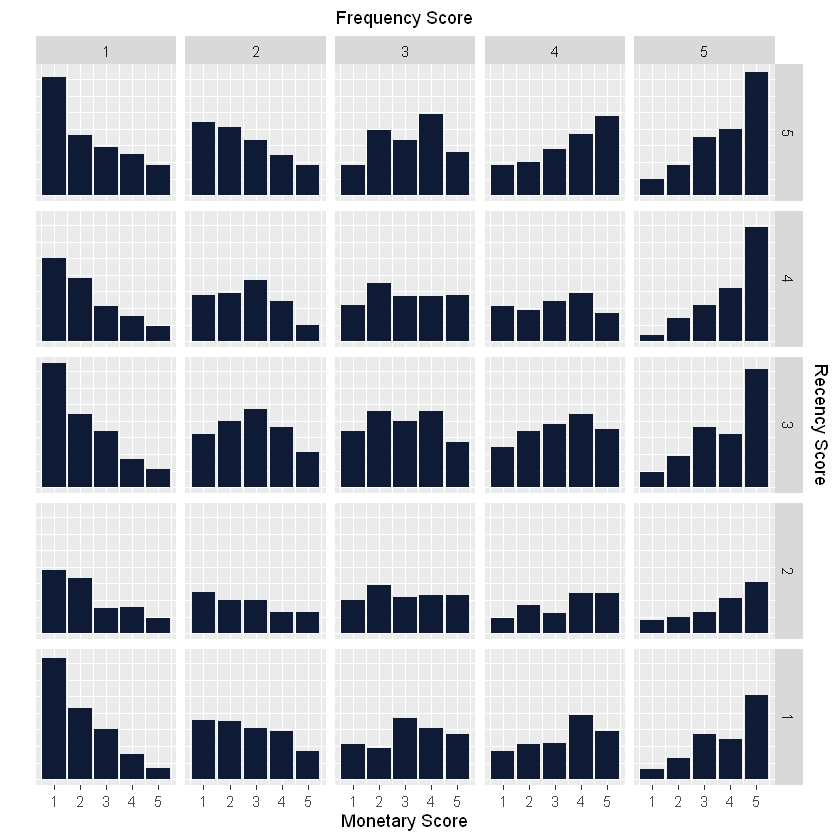

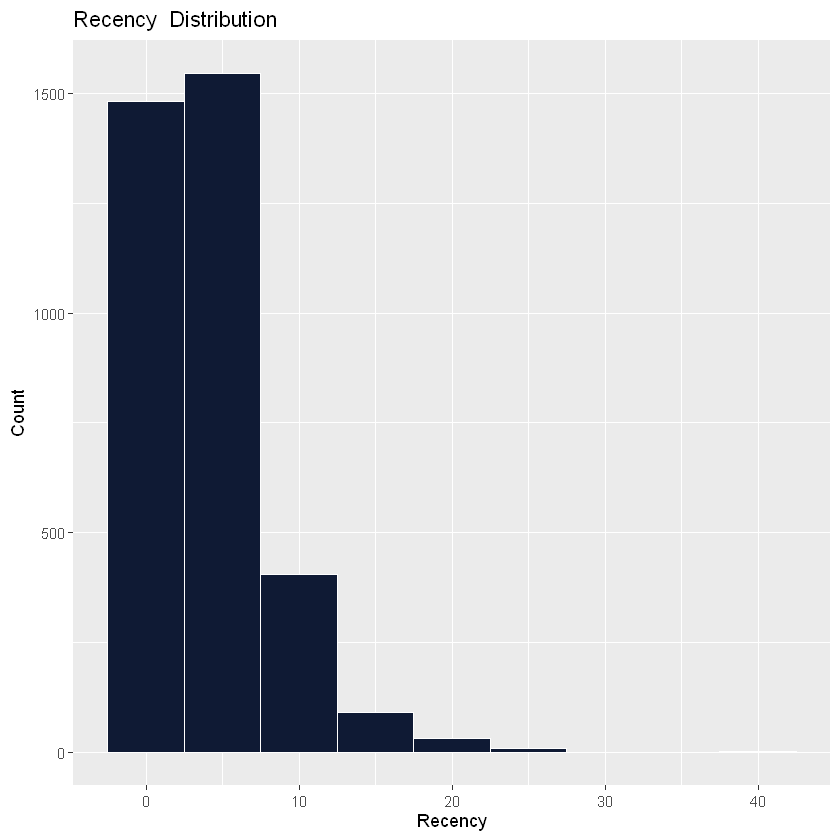

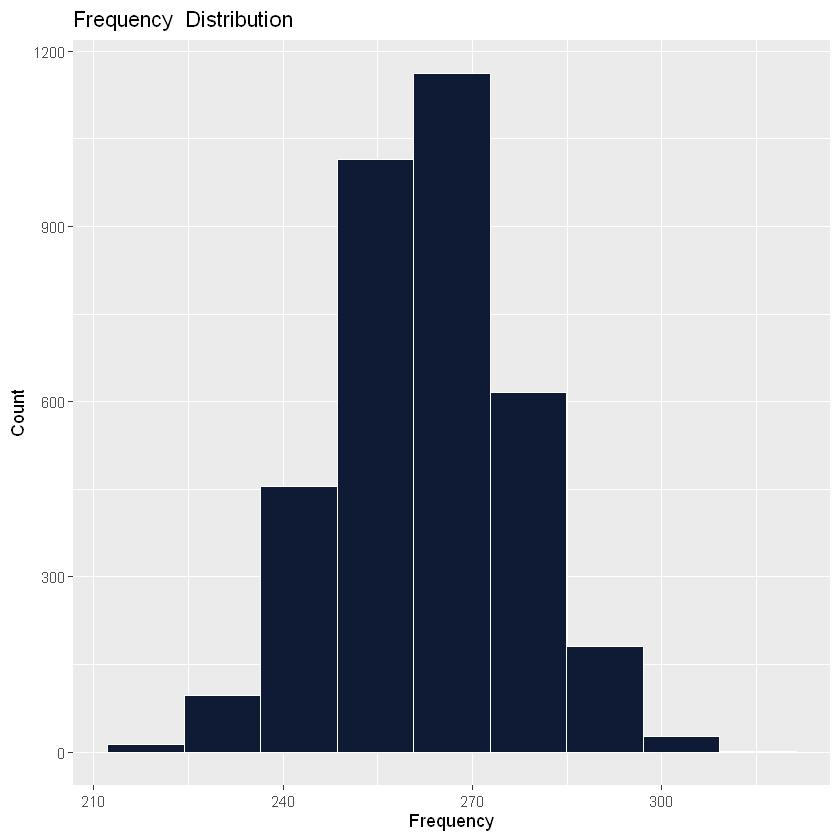

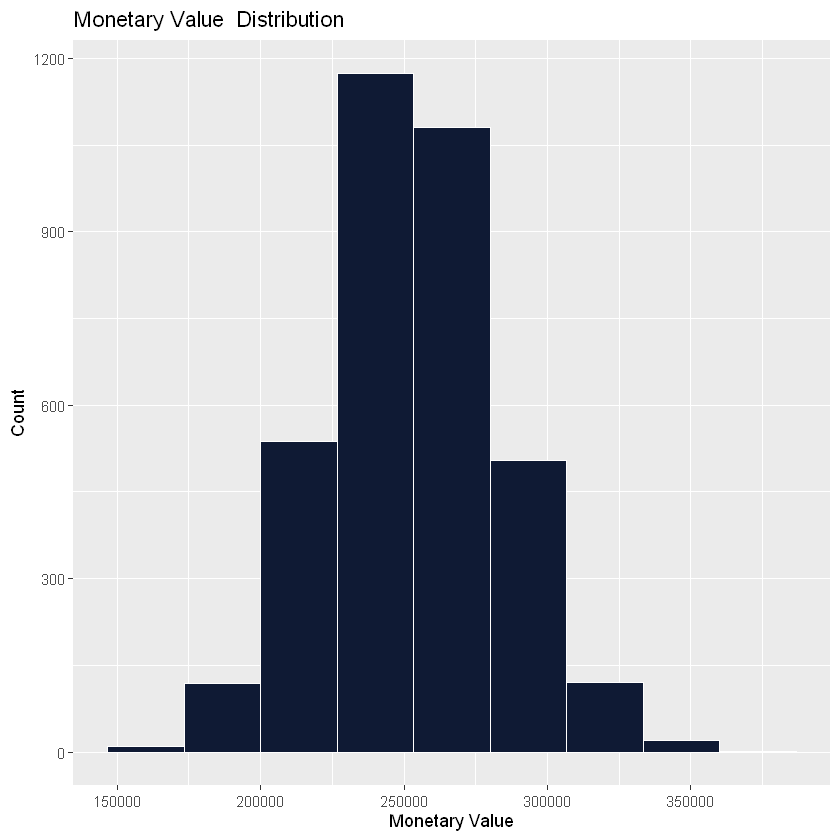

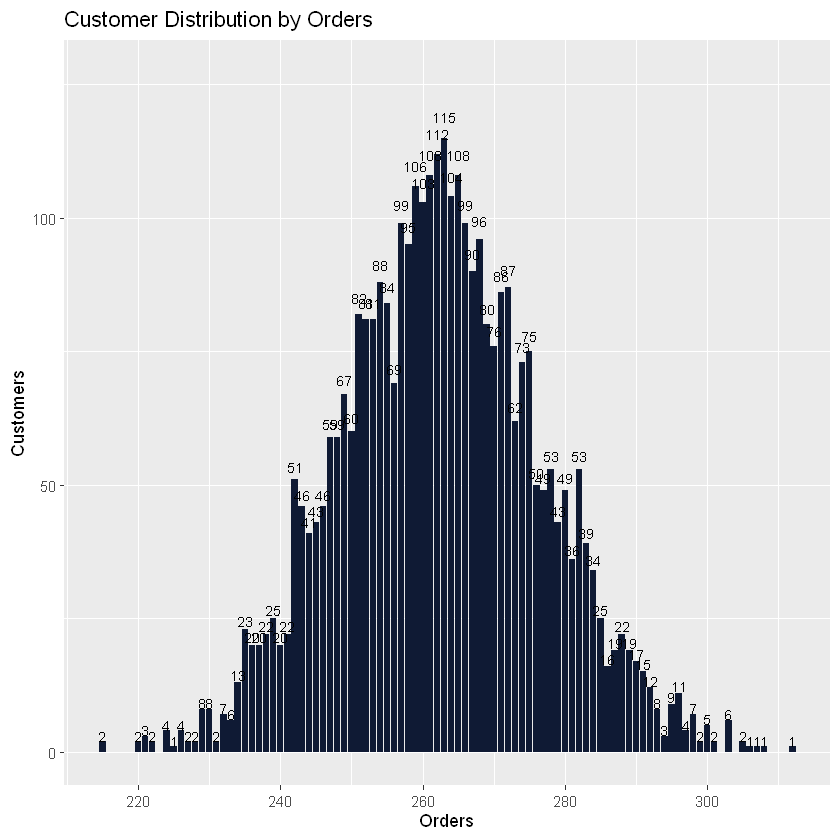

ERROR: Error in rfm_plot_scatter(rfm_result_b2b): konnte Funktion "rfm_plot_scatter" nicht finden


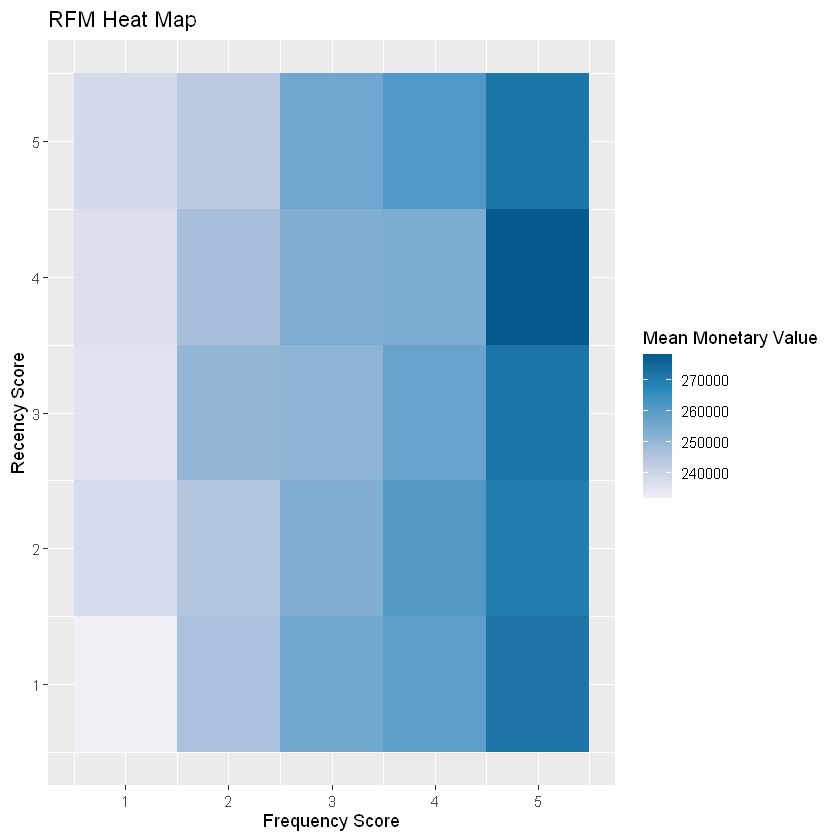

In [16]:
# Verteilungen & Heatmaps
# B2B ------------------------------------------------------
# RFM-Visualisierungen für B2B (invoice-wise Datenbasis)
rfm_plot_bar_chart(rfm_result_b2b)                          # RFM-Score Übersicht
rfm_plot_histogram(rfm_result_b2b, metric = "recency")      # Recency-Verteilung
rfm_plot_histogram(rfm_result_b2b, metric = "frequency")    # Frequency-Verteilung
rfm_plot_histogram(rfm_result_b2b, metric = "monetary")     # Monetary-Verteilung
rfm_plot_order_dist(rfm_result_b2b)                         # Score-Kombinationen
rfm_plot_heatmap(rfm_result_b2b)                            # Recency x Frequency Heatmap
rfm_plot_scatter(rfm_result_b2b)                            # Scatter: Recency vs Monetary


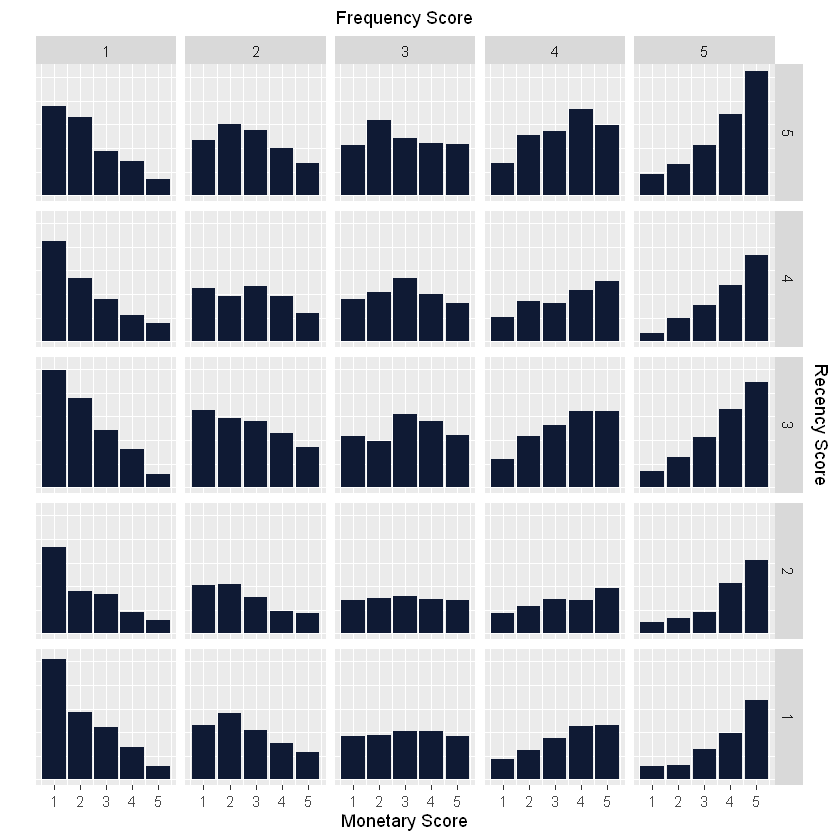

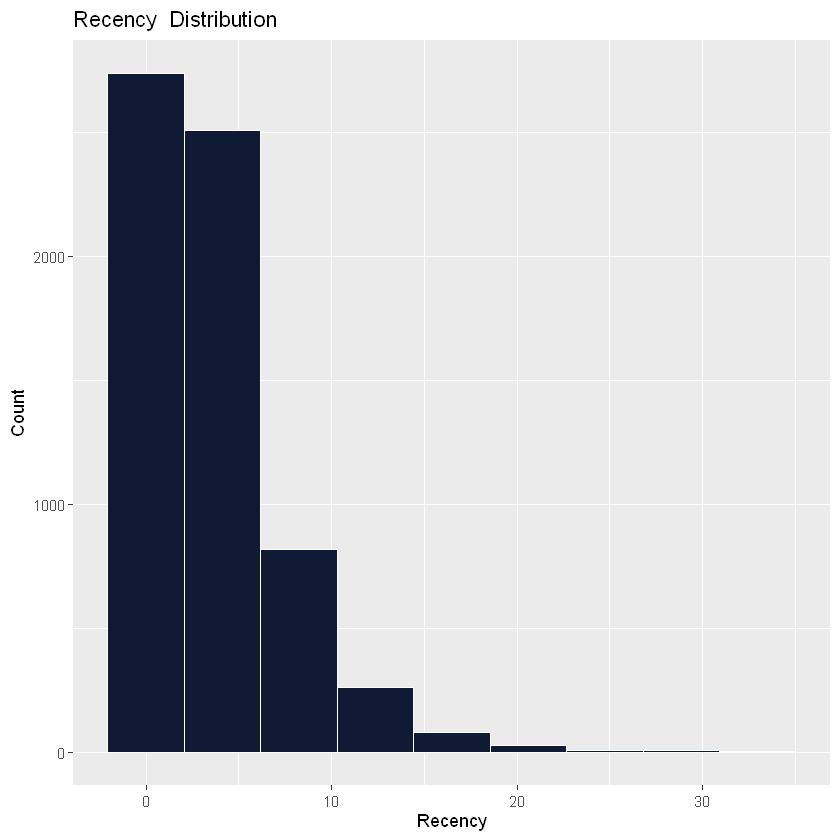

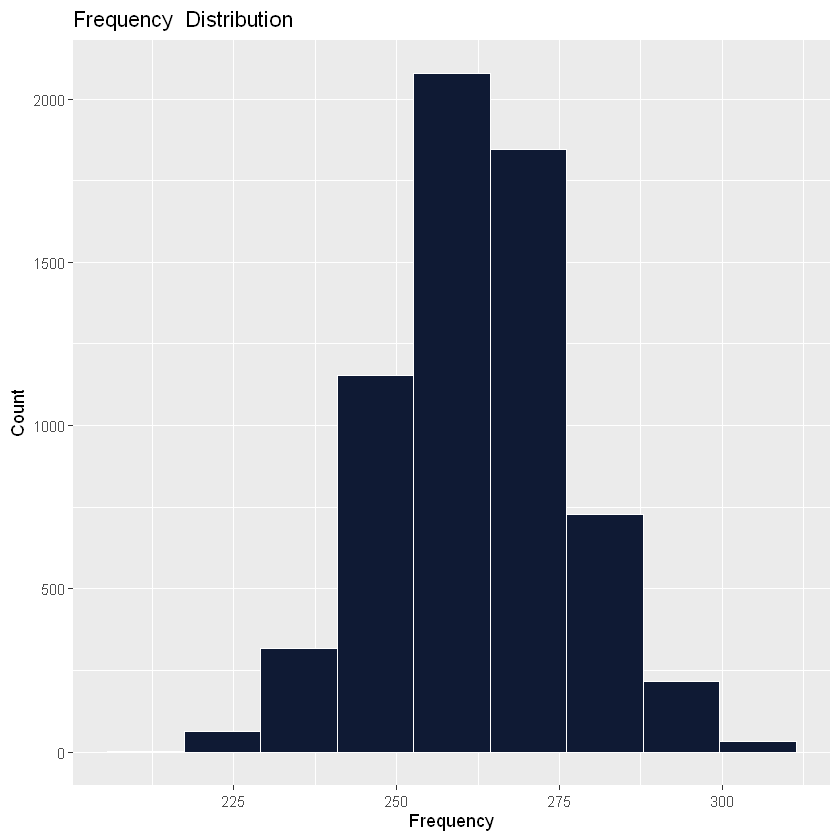

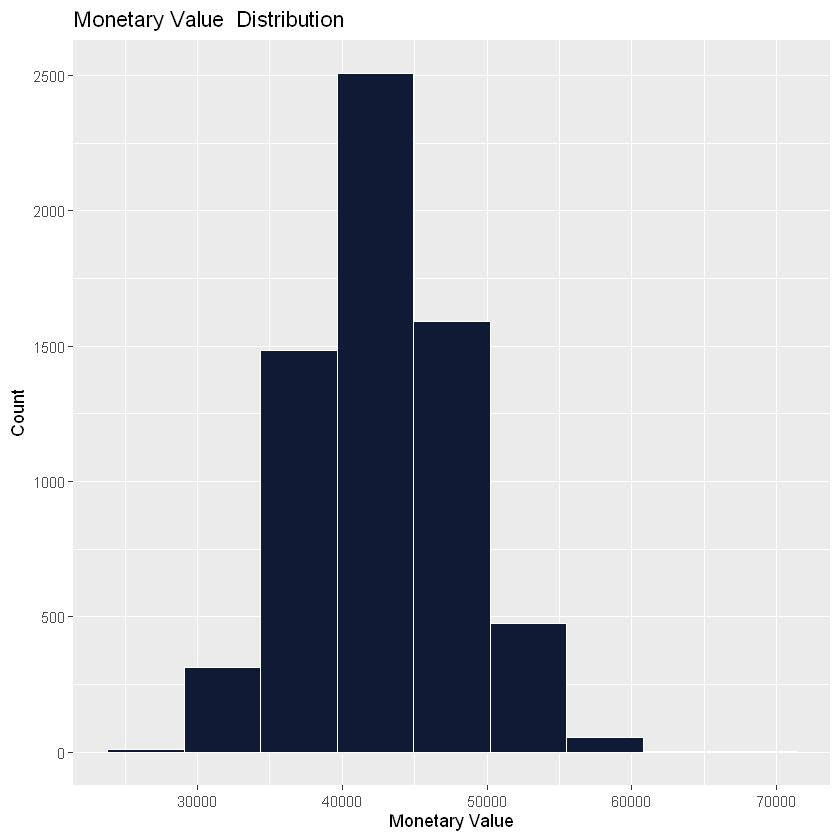

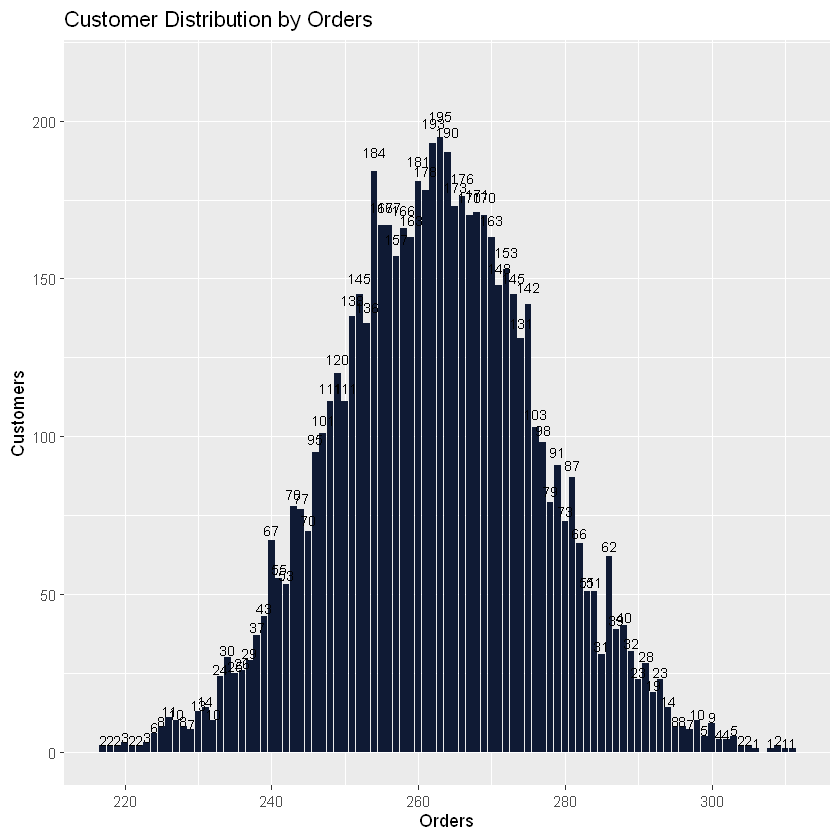

ERROR: Error in rfm_plot_scatter(rfm_result_b2c): konnte Funktion "rfm_plot_scatter" nicht finden


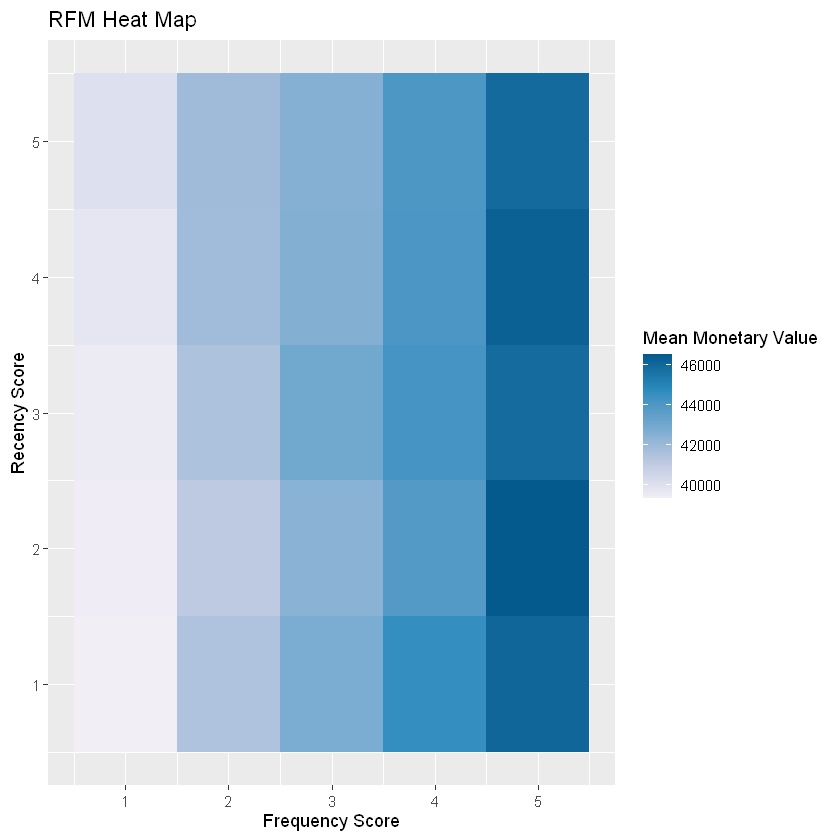

In [ ]:
# B2C ------------------------------------------------------
# RFM-Visualisierungen für B2C (invoice-wise Datenbasis)
rfm_plot_bar_chart(rfm_result_b2c)
rfm_plot_histogram(rfm_result_b2c, metric = "recency")
rfm_plot_histogram(rfm_result_b2c, metric = "frequency")
rfm_plot_histogram(rfm_result_b2c, metric = "monetary")
rfm_plot_order_dist(rfm_result_b2c)
rfm_plot_heatmap(rfm_result_b2c)
rfm_plot_scatter(rfm_result_b2c)

# Erste RFM einteilungsversuch, nach Vorlesung

In [17]:
# Segmentierung der Kunden
# B2B ------------------------------------------------------
rfm_segmented_b2b <- rfm_result_b2b$rfm %>%
  mutate(
    segment = case_when(
      recency_score %in% 4:5 & frequency_score %in% 4:5 & monetary_score %in% 4:5 ~ "Champions",
      recency_score %in% 2:5 & frequency_score %in% 3:5 & monetary_score %in% 3:5 ~ "Loyal Customers",
      recency_score %in% 3:5 & frequency_score %in% 1:3 & monetary_score %in% 1:3 ~ "Potential Loyalist",
      recency_score %in% 4:5 & frequency_score <= 1 & monetary_score <= 1 ~ "New Customers",
      recency_score %in% 3:4 & frequency_score <= 1 & monetary_score <= 1 ~ "Promising",
      recency_score %in% 2:3 & frequency_score %in% 2:3 & monetary_score %in% 2:3 ~ "Need Attention",
      recency_score %in% 2:3 & frequency_score <= 2 & monetary_score <= 2 ~ "About To Sleep",
      recency_score <= 2 & frequency_score %in% 2:5 & monetary_score %in% 2:5 ~ "At Risk",
      recency_score <= 1 & frequency_score %in% 4:5 & monetary_score %in% 4:5 ~ "Can’t Lose Them",
      recency_score %in% 1:2 & frequency_score %in% 1:2 & monetary_score %in% 1:2 ~ "Hibernating",
      recency_score <= 2 & frequency_score <= 2 & monetary_score <= 2 ~ "Lost",
      TRUE ~ "Uncategorized"
    )
  )

# B2C ------------------------------------------------------
rfm_segmented_b2c <- rfm_result_b2c$rfm %>%
  mutate(
    segment = case_when(
      recency_score %in% 4:5 & frequency_score %in% 4:5 & monetary_score %in% 4:5 ~ "Champions",
      recency_score %in% 2:5 & frequency_score %in% 3:5 & monetary_score %in% 3:5 ~ "Loyal Customers",
      recency_score %in% 3:5 & frequency_score %in% 1:3 & monetary_score %in% 1:3 ~ "Potential Loyalist",
      recency_score %in% 4:5 & frequency_score <= 1 & monetary_score <= 1 ~ "New Customers",
      recency_score %in% 3:4 & frequency_score <= 1 & monetary_score <= 1 ~ "Promising",
      recency_score %in% 2:3 & frequency_score %in% 2:3 & monetary_score %in% 2:3 ~ "Need Attention",
      recency_score %in% 2:3 & frequency_score <= 2 & monetary_score <= 2 ~ "About To Sleep",
      recency_score <= 2 & frequency_score %in% 2:5 & monetary_score %in% 2:5 ~ "At Risk",
      recency_score <= 1 & frequency_score %in% 4:5 & monetary_score %in% 4:5 ~ "Can’t Lose Them",
      recency_score %in% 1:2 & frequency_score %in% 1:2 & monetary_score %in% 1:2 ~ "Hibernating",
      recency_score <= 2 & frequency_score <= 2 & monetary_score <= 2 ~ "Lost",
      TRUE ~ "Uncategorized"
    )
  )


In [18]:
# B2B
# Berechne Gesamtzahl der Kunden (für prozentuale Anteile später)
total_customers <- nrow(rfm_segmented_b2b)

# Definiere alle Segmente explizit, damit später fehlende (0-Kunden-)Segmente ergänzt werden können
all_segments <- c(
  "Champions", "Loyal Customers", "Potential Loyalist", "New Customers",
  "Promising", "Need Attention", "About To Sleep", "At Risk",
  "Can’t Lose Them", "Hibernating", "Lost", "Uncategorized"
)

# Aggregiere Kennzahlen pro RFM-Segment
segment_analysis_b2b <- rfm_segmented_b2b %>%
  group_by(segment) %>%
  summarise(
    no_customers = n(),  # Anzahl der Kunden im Segment
    avg_spending = round(mean(amount, na.rm = TRUE), 2),  # Durchschnittlicher Gesamtumsatz pro Kunde im Segment
    avg_transactions = round(mean(transaction_count, na.rm = TRUE), 2),  # Durchschnittliche Anzahl an Bestellungen pro Kunde
    avg_recency_days = round(mean(recency_days, na.rm = TRUE), 1),  # Durchschnittlicher Abstand (in Tagen) zum letzten Kauf
    .groups = "drop"
  ) %>%
  mutate(
    total_customers = total_customers,  # Referenzwert für Gesamtzahl
    percentage = round(100 * no_customers / total_customers, 1)  # Anteil des Segments an allen Kunden
  ) %>%
  # Ergänze fehlende Segmente mit 0-Kunden
  right_join(tibble(segment = all_segments), by = "segment") %>%
  replace_na(list(
    no_customers = 0,
    avg_spending = 0,
    avg_transactions = 0,
    avg_recency_days = 0,
    percentage = 0,
    total_customers = total_customers
  )) %>%
  arrange(factor(segment, levels = all_segments))  # Behalte die vorgegebene Reihenfolge der Segmente bei


# B2C
# Berechne Gesamtzahl der Kunden (für prozentuale Anteile später)
total_customers <- nrow(rfm_segmented_b2c)

# Definiere alle Segmente explizit, damit später fehlende (0-Kunden-)Segmente ergänzt werden können
all_segments <- c(
  "Champions", "Loyal Customers", "Potential Loyalist", "New Customers",
  "Promising", "Need Attention", "About To Sleep", "At Risk",
  "Can’t Lose Them", "Hibernating", "Lost", "Uncategorized"
)

# Aggregiere Kennzahlen pro RFM-Segment
segment_analysis_b2c <- rfm_segmented_b2c %>%
  group_by(segment) %>%
  summarise(
    no_customers = n(),  # Anzahl der Kunden im Segment
    avg_spending = round(mean(amount, na.rm = TRUE), 2),  # Durchschnittlicher Gesamtumsatz pro Kunde im Segment
    avg_transactions = round(mean(transaction_count, na.rm = TRUE), 2),  # Durchschnittliche Anzahl an Bestellungen pro Kunde
    avg_recency_days = round(mean(recency_days, na.rm = TRUE), 1),  # Durchschnittlicher Abstand (in Tagen) zum letzten Kauf
    .groups = "drop"
  ) %>%
  mutate(
    total_customers = total_customers,  # Referenzwert für Gesamtzahl
    percentage = round(100 * no_customers / total_customers, 1)  # Anteil des Segments an allen Kunden
  ) %>%
  # Ergänze fehlende Segmente mit 0-Kunden
  right_join(tibble(segment = all_segments), by = "segment") %>%
  replace_na(list(
    no_customers = 0,
    avg_spending = 0,
    avg_transactions = 0,
    avg_recency_days = 0,
    percentage = 0,
    total_customers = total_customers
  )) %>%
  arrange(factor(segment, levels = all_segments))  # Behalte die vorgegebene Reihenfolge der Segmente bei

# Tabelle zur Darstellung im Report
kable(segment_analysis_b2b, caption = "RFM Analysis – B2B")
kable(segment_analysis_b2c, caption = "RFM Analysis – B2C")




Table: RFM Analysis – B2B

|segment            | no_customers| avg_spending| avg_transactions| avg_recency_days| total_customers| percentage|
|:------------------|------------:|------------:|----------------:|----------------:|---------------:|----------:|
|Champions          |          346|     286637.7|           278.65|              1.4|            3563|        9.7|
|Loyal Customers    |          861|     270568.3|           270.97|              3.2|            3563|       24.2|
|Potential Loyalist |          923|     230295.2|           252.08|              2.2|            3563|       25.9|
|New Customers      |            0|          0.0|             0.00|              0.0|            3563|        0.0|
|Promising          |            0|          0.0|             0.00|              0.0|            3563|        0.0|
|Need Attention     |           69|     241827.5|           258.45|              5.4|            3563|        1.9|
|About To Sleep     |           96|     218367.9|  



Table: RFM Analysis – B2C

|segment            | no_customers| avg_spending| avg_transactions| avg_recency_days| total_customers| percentage|
|:------------------|------------:|------------:|----------------:|----------------:|---------------:|----------:|
|Champions          |          652|     48376.31|           277.98|              1.4|            6437|       10.1|
|Loyal Customers    |         1589|     45834.36|           271.18|              3.3|            6437|       24.7|
|Potential Loyalist |         1646|     38665.34|           251.68|              2.2|            6437|       25.6|
|New Customers      |            0|         0.00|             0.00|              0.0|            6437|        0.0|
|Promising          |            0|         0.00|             0.00|              0.0|            6437|        0.0|
|Need Attention     |          127|     40608.60|           258.06|              5.4|            6437|        2.0|
|About To Sleep     |          187|     36348.92|  

In [19]:
# Drucke ein paar Beispiele von Uncategorized-Kunden
rfm_segmented_b2c %>%
  filter(segment == "Uncategorized") %>%
  select(customer_id, recency_score, frequency_score, monetary_score, amount, transaction_count, recency_days) %>%
  head(10)


customer_id,recency_score,frequency_score,monetary_score,amount,transaction_count,recency_days
<chr>,<int>,<int>,<int>,<dbl>,<int>,<dbl>
CUS1001,5,4,1,35749.85,268,1
CUS1003,5,2,4,45890.74,254,1
CUS1015,4,4,2,41273.83,268,2
CUS1039,5,5,1,34475.56,275,1
CUS1040,4,4,1,32852.74,273,2
CUS1041,4,4,2,40552.85,270,2
CUS1050,4,5,1,35897.40,283,2
CUS1056,2,4,1,37257.30,268,5
CUS1087,1,3,1,36951.99,261,7


In [20]:
# Definiere alle möglichen Segmente in der gewünschten Reihenfolge
all_segments <- c(
  "Champions", "Loyal Customers", "Potential Loyalist", 
  "New Customers", "Need Attention", "Promising",
  "About To Sleep", "At Risk", "Can’t Lose Them",
  "Hibernating", "Lost", "Active High Value",
  "Active Medium Value", "Dormant High Value",  # "Low" durch "Medium" ersetzen
  "Occasional Shoppers", "Dormant Big Spenders"
)

rfm_segmented_b2c <- rfm_result_b2c$rfm %>%
  mutate(
    segment = case_when(
      recency_score >= 5 & frequency_score >= 5 & monetary_score >= 5 ~ "Champions",
      recency_score >= 4 & frequency_score >= 4 & monetary_score >= 4 ~ "Loyal Customers",
      recency_score >= 4 & frequency_score >= 3 & monetary_score >= 3 ~ "Potential Loyalist",
      recency_score >= 4 & frequency_score >= 2 & monetary_score >= 2 ~ "New Customers",
      recency_score >= 3 & frequency_score == 2 ~ "Occasional Shoppers",
      recency_score >= 3 & frequency_score >= 3 & monetary_score >= 3 ~ "Need Attention",
      recency_score >= 3 & frequency_score == 1 ~ "Promising",
      recency_score >= 2 & frequency_score >= 3 ~ "At Risk",
      recency_score >= 2 & frequency_score == 2 ~ "About To Sleep",
      recency_score >= 1 & frequency_score >= 3 ~ "Can’t Lose Them",
      recency_score >= 1 & frequency_score <= 2 & monetary_score <= 3 ~ "Hibernating",  # Monetary erhöht
      recency_score <= 3 & frequency_score <= 1 & monetary_score <= 2 ~ "Lost",
      recency_score >= 3 & monetary_score >= 3 ~ "Active High Value",
      recency_score >= 3 & monetary_score >= 2 ~ "Active Medium Value",  # Neue Mittelkategorie
      recency_score < 3 & monetary_score >= 2 ~ "Dormant High Value",
      TRUE ~ "Uncategorized"
    )
  )
segment_analysis_b2c <- rfm_segmented_b2c %>%
  group_by(segment) %>%
  summarise(
    no_customers = n(),
    avg_spending = round(mean(amount, na.rm = TRUE), 2),  # FEHLER HIER WAR EIN FEHLENDES ARGUMENT
    avg_transactions = round(mean(transaction_count, na.rm = TRUE), 2),
    avg_recency_days = round(mean(recency_days, na.rm = TRUE), 1),
    .groups = "drop"
  ) %>%
  mutate(
    total_customers = total_customers,  # Stelle sicher dass diese Variable existiert
    percentage = round(100 * no_customers / total_customers, 1)
  ) %>%
  right_join(tibble(segment = all_segments), by = "segment") %>%
  replace_na(list(
    no_customers = 0,
    avg_spending = 0,
    avg_transactions = 0,
    avg_recency_days = 0,
    percentage = 0,
    total_customers = total_customers
  )) %>%
  arrange(factor(segment, levels = all_segments))


###########B2B###########
  rfm_segmented_b2b <- rfm_result_b2b$rfm %>%
  mutate(
    segment = case_when(
      recency_score >= 5 & frequency_score >= 5 & monetary_score >= 5 ~ "Champions",
      recency_score >= 4 & frequency_score >= 4 & monetary_score >= 4 ~ "Loyal Customers",
      recency_score >= 4 & frequency_score >= 3 & monetary_score >= 3 ~ "Potential Loyalist",
      recency_score >= 4 & frequency_score >= 2 & monetary_score >= 2 ~ "New Customers",
      recency_score >= 3 & frequency_score == 2 ~ "Occasional Shoppers",
      recency_score >= 3 & frequency_score >= 3 & monetary_score >= 3 ~ "Need Attention",
      recency_score >= 3 & frequency_score == 1 ~ "Promising",
      recency_score >= 2 & frequency_score >= 3 ~ "At Risk",
      recency_score >= 2 & frequency_score == 2 ~ "About To Sleep",
      recency_score >= 1 & frequency_score >= 3 ~ "Can’t Lose Them",
      recency_score >= 1 & frequency_score <= 2 & monetary_score <= 3 ~ "Hibernating",  # Monetary erhöht
      recency_score <= 3 & frequency_score <= 1 & monetary_score <= 2 ~ "Lost",
      recency_score >= 3 & monetary_score >= 3 ~ "Active High Value",
      recency_score >= 3 & monetary_score >= 2 ~ "Active Medium Value",  # Neue Mittelkategorie
      recency_score < 3 & monetary_score >= 2 ~ "Dormant High Value",
      TRUE ~ "Uncategorized"
    )
  )
segment_analysis_b2b <- rfm_segmented_b2b %>%
  group_by(segment) %>%
  summarise(
    no_customers = n(),
    avg_spending = round(mean(amount, na.rm = TRUE), 2),  # FEHLER HIER WAR EIN FEHLENDES ARGUMENT
    avg_transactions = round(mean(transaction_count, na.rm = TRUE), 2),
    avg_recency_days = round(mean(recency_days, na.rm = TRUE), 1),
    .groups = "drop"
  ) %>%
  mutate(
    total_customers = total_customers,  # Stelle sicher dass diese Variable existiert
    percentage = round(100 * no_customers / total_customers, 1)
  ) %>%
  right_join(tibble(segment = all_segments), by = "segment") %>%
  replace_na(list(
    no_customers = 0,
    avg_spending = 0,
    avg_transactions = 0,
    avg_recency_days = 0,
    percentage = 0,
    total_customers = total_customers
  )) %>%
  arrange(factor(segment, levels = all_segments))

kable(segment_analysis_b2b, caption = "RFM Analysis – B2B")



Table: RFM Analysis – B2B

|segment              | no_customers| avg_spending| avg_transactions| avg_recency_days| total_customers| percentage|
|:--------------------|------------:|------------:|----------------:|----------------:|---------------:|----------:|
|Champions            |           74|     298748.1|           284.18|              1.0|            6437|        1.1|
|Loyal Customers      |          272|     283342.9|           277.15|              1.5|            6437|        4.2|
|Potential Loyalist   |          299|     263104.2|           267.87|              1.4|            6437|        4.6|
|New Customers        |          361|     248663.4|           261.05|              1.5|            6437|        5.6|
|Need Attention       |          369|     273916.7|           272.87|              3.4|            6437|        5.7|
|Promising            |          493|     236679.6|           244.05|              2.1|            6437|        7.7|
|About To Sleep       |           9

# MLR mit Sven ab hier


In [21]:
mlr_data <- line_wise_b2c %>%
  mutate(
    product = as.factor(product),
    region = as.factor(region),
    discount = as.numeric(discount),
    order_date = as.Date(order_date),
    month = factor(format(order_date, "%m"))  # Extrahiere Monat als saisonaler Effekt
  ) %>%
  select(quantity, discount, product, region, month) %>%
  na.omit()


model <- lm(quantity ~ discount + product + region + month, data = mlr_data)
summary(model)





Call:
lm(formula = quantity ~ discount + product + region + month, 
    data = mlr_data)

Residuals:
   Min     1Q Median     3Q    Max 
-7.065 -3.990  0.000  3.991  7.058 

Coefficients: (1 not defined because of singularities)
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   7.990e+00  1.413e-02 565.559   <2e-16 ***
discount                             NA         NA      NA       NA    
productAugustiner             1.082e-02  1.920e-02   0.563   0.5733    
productBacardi               -1.798e-02  1.921e-02  -0.936   0.3493    
productBeck's                 1.897e-03  1.800e-02   0.105   0.9161    
productChardonnay            -1.495e-02  1.920e-02  -0.779   0.4362    
productClub Mate              1.993e-03  1.668e-02   0.119   0.9049    
productCoca-Cola             -1.097e-03  1.624e-02  -0.068   0.9461    
productCranberry Juice       -5.362e-03  1.441e-02  -0.372   0.7098    
productErdinger Weißbier      1.821e-02  1.907e-02

# Multiple linear regression ab hier

In [ ]:
total_price ~ unit_price + discount + region + product_category + customer_type

total_price ~ unit_price + discount + region + product_category + 
    customer_type

In [ ]:
install.packages(c("caret"))

Installiere Paket nach 'C:/Users/Nutzer/AppData/Local/R/win-library/4.4'
(da 'lib' nicht spezifiziert)

installiere auch Abhängigkeiten 'listenv', 'parallelly', 'future', 'globals', 'shape', 'future.apply', 'numDeriv', 'progressr', 'SQUAREM', 'diagram', 'lava', 'prodlim', 'proxy', 'iterators', 'clock', 'gower', 'hardhat', 'ipred', 'sparsevctrs', 'e1071', 'foreach', 'ModelMetrics', 'plyr', 'pROC', 'recipes', 'reshape2'





  Es gibt eine Binärversion, jedoch ist der Quelltext neuer:
           binary source needs_compilation
parallelly 1.43.0 1.44.0              TRUE

  Binaries will be installed
Paket 'listenv' erfolgreich ausgepackt und MD5 Summen abgeglichen
Paket 'parallelly' erfolgreich ausgepackt und MD5 Summen abgeglichen
Paket 'future' erfolgreich ausgepackt und MD5 Summen abgeglichen
Paket 'globals' erfolgreich ausgepackt und MD5 Summen abgeglichen
Paket 'shape' erfolgreich ausgepackt und MD5 Summen abgeglichen
Paket 'future.apply' erfolgreich ausgepackt und MD5 Summen abgeglichen
Paket 'numDeriv' erfolgreich ausgepackt und MD5 Summen abgeglichen
Paket 'progressr' erfolgreich ausgepackt und MD5 Summen abgeglichen
Paket 'SQUAREM' erfolgreich ausgepackt und MD5 Summen abgeglichen
Paket 'diagram' erfolgreich ausgepackt und MD5 Summen abgeglichen
Paket 'lava' erfolgreich ausgepackt und MD5 Summen abgeglichen
Paket 'prodlim' erfolgreich ausgepackt und MD5 Summen abgeglichen
Paket 'proxy' erfolgreich

In [ ]:
# Vorhersage des Gesamtpreises (total_price) auf Basis der anderen Variablen (quantity, discount, unit_price)
# Modell berechnet wie stark jeder dieser drei faktoren den gesmamtpreis beeinflusst

# Daten vorbereiten
regression_data_b2b <- numeric_invoice_wise_b2b %>%
  select(
    total_price,   # Zielvariable
    quantity,      # Prädiktor 1: Stückzahl pro Rechnung
    discount,      # Prädiktor 2: Durchschnittsrabatt
    unit_price     # Prädiktor 3: Durchschnittspreis pro Einheit
  ) %>%
  na.omit()

# Train/Test-Split (80/20)
set.seed(123)
train_index_b2b <- createDataPartition(regression_data_b2b$total_price, p = 0.8, list = FALSE)
train_data_b2b <- regression_data_b2b[train_index_b2b, ]
test_data_b2b <- regression_data_b2b[-train_index_b2b, ]

# Modell trainieren
model_b2b <- lm(total_price ~ quantity + discount + unit_price, data = train_data_b2b)
summary(model_b2b)

# Evaluation
predictions_b2b <- predict(model_b2b, newdata = test_data_b2b)
performance_b2b <- data.frame(
  RMSE = RMSE(predictions_b2b, test_data_b2b$total_price),
  R_squared = R2(predictions_b2b, test_data_b2b$total_price)
)

kable(performance_b2b, digits = 3, caption = "📈 Modellgüte der linearen Regression B2B (Testdaten)")

#########B2C#########
regression_data_b2c <- numeric_invoice_wise_b2c %>%
  select(
    total_price,   # Zielvariable
    quantity,      # Prädiktor 1: Stückzahl pro Rechnung
    discount,      # Prädiktor 2: Durchschnittsrabatt
    unit_price     # Prädiktor 3: Durchschnittspreis pro Einheit
  ) %>%
  na.omit()

# Train/Test-Split (80/20)
set.seed(123)
train_index_b2c <- createDataPartition(regression_data_b2c$total_price, p = 0.8, list = FALSE)
train_data_b2c <- regression_data_b2c[train_index_b2c, ]
test_data_b2c <- regression_data_b2c[-train_index_b2c, ]

# Modell trainieren
model_b2c <- lm(total_price ~ quantity + discount + unit_price, data = train_data_b2c)
summary(model_b2c)

# Evaluation
predictions_b2c <- predict(model_b2c, newdata = test_data_b2c)
performance_b2c <- data.frame(
  RMSE = RMSE(predictions_b2c, test_data_b2c$total_price),
  R_squared = R2(predictions_b2c, test_data_b2c$total_price)
)

kable(performance_b2c, digits = 3, caption = "📈 Modellgüte der linearen Regression B2C (Testdaten)")


Call:
lm(formula = total_price ~ quantity + discount + unit_price, 
    data = train_data_b2b)

Residuals:
     Min       1Q   Median       3Q      Max 
-15584.8   -365.8    -42.7    236.2  16121.5 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -6.110e+02  4.424e+00 -138.09   <2e-16 ***
quantity     5.584e+00  1.019e-02  548.05   <2e-16 ***
discount    -1.338e+03  5.094e+01  -26.27   <2e-16 ***
unit_price   1.281e+02  1.284e-01  997.18   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 949.6 on 748237 degrees of freedom
Multiple R-squared:  0.6408,	Adjusted R-squared:  0.6408 
F-statistic: 4.449e+05 on 3 and 748237 DF,  p-value: < 2.2e-16




Table: 📈 Modellgüte der linearen Regression B2B (Testdaten)

|    RMSE| R_squared|
|-------:|---------:|
| 940.747|     0.644|


Call:
lm(formula = total_price ~ quantity + discount + unit_price, 
    data = train_data_b2c)

Residuals:
     Min       1Q   Median       3Q      Max 
-1919.40   -64.30   -10.67    34.39  2858.03 

Coefficients: (1 not defined because of singularities)
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -112.29975    0.29939  -375.1   <2e-16 ***
quantity       5.92601    0.00881   672.7   <2e-16 ***
discount            NA         NA      NA       NA    
unit_price    19.01331    0.01530  1243.0   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 176.3 on 1351218 degrees of freedom
Multiple R-squared:  0.5968,	Adjusted R-squared:  0.5968 
F-statistic: 1e+06 on 2 and 1351218 DF,  p-value: < 2.2e-16




Table: 📈 Modellgüte der linearen Regression B2C (Testdaten)

|    RMSE| R_squared|
|-------:|---------:|
| 176.871|     0.596|

In [ ]:
library(dplyr)
library(lubridate)

regression_data_b2b <- full_invoice_wise_b2b %>%
  mutate(
    order_date = as.Date(order_date),
    year = year(order_date),
    month = month(order_date),
    quarter = quarter(order_date),
    region = as.factor(region)  # Keine Leerzeichen oder Tippfehler!
  ) %>%
  select(
    total_price,
    quantity,
    discount,
    unit_price,
    region,  # Sicherstellen, dass region ausgewählt ist
    quarter
  ) %>%
  na.omit()

  # Train/Test-Split
set.seed(123)
train_index_b2b <- createDataPartition(regression_data_b2b$total_price, p = 0.8, list = FALSE)
train_data_b2b <- regression_data_b2b[train_index_b2b, ]
test_data_b2b <- regression_data_b2b[-train_index_b2b, ]

# Modell mit Region und Quartal
model_b2b <- lm(
  total_price ~ quantity + discount + unit_price + region + quarter,
  data = train_data_b2b  # Verwenden Sie den korrigierten Datensatz
)

# Ergebnisse anzeigen
summary(model_b2b)

predictions_b2b <- predict(model_b2b, newdata = test_data_b2b)
performance_b2b <- data.frame(
  RMSE = RMSE(predictions_b2b, test_data_b2b$total_price),
  R_squared = R2(predictions_b2b, test_data_b2b$total_price)
)

kable(performance_b2b, digits = 3, caption = "📈 Modellgüte der linearen Regression B2B (Testdaten)")



regression_data_b2c <- full_invoice_wise_b2c %>%
  mutate(
    order_date = as.Date(order_date),
    year = year(order_date),
    month = month(order_date),
    quarter = quarter(order_date),
    region = as.factor(region)  # Keine Leerzeichen oder Tippfehler!
  ) %>%
  select(
    total_price,
    quantity,
    discount,
    unit_price,
    region,  # Sicherstellen, dass region ausgewählt ist
    quarter
  ) %>%
  na.omit()

  # Train/Test-Split
set.seed(123)
train_index_b2c <- createDataPartition(regression_data_b2c$total_price, p = 0.8, list = FALSE)
train_data_b2c <- regression_data_b2c[train_index_b2c, ]
test_data_b2c <- regression_data_b2c[-train_index_b2c, ]

# Modell mit Region und Quartal
model_b2c <- lm(
  total_price ~ quantity + discount + unit_price + region + quarter,
  data = train_data_b2c  # Verwenden Sie den korrigierten Datensatz
)

# Ergebnisse anzeigen
summary(model_b2c)

predictions_b2c <- predict(model_b2c, newdata = test_data_b2c)
performance_b2c <- data.frame(
  RMSE = RMSE(predictions_b2c, test_data_b2c$total_price),
  R_squared = R2(predictions_b2c, test_data_b2c$total_price)
)

kable(performance_b2c, digits = 3, caption = "📈 Modellgüte der linearen Regression B2C (Testdaten)")


Call:
lm(formula = total_price ~ quantity + discount + unit_price + 
    region + quarter, data = train_data_b2b)

Residuals:
     Min       1Q   Median       3Q      Max 
-14236.0   -329.1    -38.0    209.0  13209.4 

Coefficients:
                               Estimate Std. Error  t value Pr(>|t|)    
(Intercept)                   -554.5698     5.5255 -100.365  < 2e-16 ***
quantity                         5.5372     0.0109  507.851  < 2e-16 ***
discount                     -1207.2195    41.5220  -29.074  < 2e-16 ***
unit_price                     118.6253     0.1039 1141.578  < 2e-16 ***
regionBayern                    -0.2001     5.3246   -0.038   0.9700    
regionBerlin                    -2.7625     5.2728   -0.524   0.6003    
regionBrandenburg               -3.0528     5.3354   -0.572   0.5672    
regionBremen                   -27.9364     5.2503   -5.321 1.03e-07 ***
regionHamburg                    2.6056     5.1380    0.507   0.6121    
regionHessen                     2.8



Table: 📈 Modellgüte der linearen Regression B2B (Testdaten)

|    RMSE| R_squared|
|-------:|---------:|
| 863.355|     0.648|


Call:
lm(formula = total_price ~ quantity + discount + unit_price + 
    region + quarter, data = train_data_b2c)

Residuals:
     Min       1Q   Median       3Q      Max 
-1755.71   -58.52    -9.89    30.31  1974.71 

Coefficients: (1 not defined because of singularities)
                               Estimate Std. Error  t value Pr(>|t|)    
(Intercept)                  -1.031e+02  6.365e-01 -161.951  < 2e-16 ***
quantity                      5.929e+00  9.476e-03  625.722  < 2e-16 ***
discount                             NA         NA       NA       NA    
unit_price                    1.746e+01  1.239e-02 1409.791  < 2e-16 ***
regionBayern                 -5.242e-01  7.264e-01   -0.722   0.4705    
regionBerlin                  1.770e-01  7.344e-01    0.241   0.8095    
regionBrandenburg            -1.616e+00  7.382e-01   -2.190   0.0286 *  
regionBremen                 -4.659e+00  7.255e-01   -6.422 1.35e-10 ***
regionHamburg                 5.392e-01  7.177e-01    0.751   0.4525



Table: 📈 Modellgüte der linearen Regression B2C (Testdaten)

|    RMSE| R_squared|
|-------:|---------:|
| 160.433|     0.603|

Interpretation der Regressionsergebnisse
Hier sind die zentralen Erkenntnisse aus dem Modell und ihre geschäftliche Bedeutung:

1. Kernvariablen: Mengen, Rabatte & Stückpreise
Variable	Koeffizient	Interpretation
quantity	+5.54	Jede zusätzliche Einheit steigert den Umsatz um €5.54 pro Rechnung.
discount	–1,207.22	Ein 1%-Punkt höherer Rabatt reduziert den Umsatz um €1,207.22 pro Rechnung.
unit_price	+118.63	Eine €1 Erhöhung des Stückpreises steigert den Umsatz um €118.63 pro Rechnung.
Warum ist das wichtig?

Preiselastizität: Der starke Effekt von unit_price zeigt, dass Preiserhöhungen den Umsatz deutlich steigern – ein Hebel für Margenoptimierung.

Rabatt-Dilemma: Rabatte senken den Umsatz drastisch. Ein 5%-Rabatt kostet im Schnitt €6,036.10 pro Rechnung – das muss durch höhere Absatzmengen kompensiert werden.

2. Regionale Unterschiede
Die Referenzregion ist Baden-Württemberg (nicht explizit aufgeführt, da sie als Baseline dient).

Region	Koeffizient	Bedeutung
Bremen	–27.94	Umsätze sind €27.94 niedriger als in Baden-Württemberg.
Nordrhein-Westfalen	–10.45	€10.45 niedriger (schwach signifikant).
Sachsen-Anhalt	–12.72	€12.72 niedriger.
Alle anderen Regionen	Nicht signifikant	Kein relevanter Unterschied zur Referenz.
Handlungsempfehlungen:

Bremen: Gezielte Rabatte oder Marketingkampagnen, um die niedrigen Umsätze auszugleichen.

Nordrhein-Westfalen/Sachsen-Anhalt: Analyse, warum diese Regionen unterdurchschnittlich abschneiden (z.B. Wettbewerb, Distributionsprobleme).

3. Saisonalität (Quartal)
Koeffizient: –0.75 (nicht signifikant, *p = 0.365*).

Interpretation: Es gibt keine starken saisonalen Umsatzschwankungen auf Quartalsebene.

Implikation:

Saisonale Effekte sind entweder vernachlässigbar oder müssen feiner analysiert werden (z.B. monatlich oder produktspezifisch).

4. Modellgüte
R² = 0.654: Das Modell erklärt 65.4% der Umsatzvarianz – sehr gut für reale Geschäftsdaten.

RMSE = €851.90: Die durchschnittliche Vorhersageabweichung beträgt €851.90 pro Rechnung.

Beispiel: Bei einem tatsächlichen Umsatz von €5.000 liegt die Prognose zwischen €4,148.10 und €5,851.90.

Strategische Empfehlungen
Preisstrategie priorisieren:

Nutzen Sie den starken Effekt von unit_price. Eine €2 Preiserhöhung generiert im Schnitt €237.26 mehr Umsatz pro Rechnung.

Achtung: Prüfen Sie, ob höhere Preise die Absatzmenge (quantity) reduzieren.

Rabattkontrolle einführen:

Setzen Sie Rabatte nur ein, wenn die erwartete Mengensteigerung den Umsatzverlust kompensiert:
Erforderliche Mengensteigerung = (1,207.22 * Rabatt) / 5.54.
Beispiel: Bei 5% Rabatt benötigen Sie 109 zusätzliche Einheiten pro Rechnung.

Regionale Fokussierung:

Bremen: Testen Sie lokale Promotionen (z.B. "Kostenloser Versand ab €500").

Nordrhein-Westfalen: Analysieren Sie Wettbewerberpreise in der Region.

Fehlende Einflussfaktoren identifizieren:

36.6% unerklärte Varianz deuten auf weitere Treiber hin:

Produktkategorien: Wirken Rabatte bei "Alkoholika" anders als bei "Wasser"?

Kundensegmente: Nutzen Sie RFM-Segmente als zusätzliche Prädiktoren.

Zusammenfassung
Das Modell bestätigt grundlegende Zusammenhänge, liefert aber auch überraschende Einblicke:

Rabatte sind extrem kostspielig – sie müssen strategisch eingesetzt werden.

Regionale Unterschiede sind klein, aber in Bremen signifikant.

Preiserhöhungen sind der stärkste Hebel für höhere Umsätze.

Nächste Schritte:

Fügen Sie Interaktionsterme hinzu (z.B. discount * region), um regional unterschiedliche Rabattwirkungen zu testen.

Analysieren Sie nichtlineare Effekte (z.B. abnehmender Grenznutzen von Rabatten).

Erweitern Sie das Modell um Produktkategorien oder Kundensegmente.

Mit diesen Erkenntnissen können Sie datengetriebene Entscheidungen treffen – von der Preisgestaltung bis zur regionalen Steuerung! 🚀

In [ ]:
# B2B-Daten
regression_b2b <- full_invoice_wise_b2b %>%
  mutate(region = as.factor(region)) %>%
  select(total_price, quantity, discount, unit_price, region)

# B2C-Daten
regression_b2c <- full_invoice_wise_b2c %>%  # Annahme: full_invoice_wise_b2c existiert analog
  mutate(region = as.factor(region)) %>%
  select(total_price, quantity, discount, unit_price, region)

  # B2B-Modell
model_b2b <- lm(total_price ~ quantity + discount + unit_price + region, data = regression_b2b)

# B2C-Modell
model_b2c <- lm(total_price ~ quantity + discount + unit_price + region, data = regression_b2c)

# Ergebnisse vergleichen
summary(model_b2b)
summary(model_b2c)


Call:
lm(formula = total_price ~ quantity + discount + unit_price + 
    region, data = regression_b2b)

Residuals:
     Min       1Q   Median       3Q      Max 
-14390.9   -330.1    -38.2    209.3  14349.6 

Coefficients:
                               Estimate Std. Error  t value Pr(>|t|)    
(Intercept)                  -5.582e+02  4.602e+00 -121.285  < 2e-16 ***
quantity                      5.548e+00  9.780e-03  567.303  < 2e-16 ***
discount                     -1.205e+03  3.723e+01  -32.363  < 2e-16 ***
unit_price                    1.184e+02  9.303e-02 1272.619  < 2e-16 ***
regionBayern                  2.453e+00  4.775e+00    0.514   0.6075    
regionBerlin                 -3.126e+00  4.733e+00   -0.660   0.5090    
regionBrandenburg            -1.672e+00  4.790e+00   -0.349   0.7271    
regionBremen                 -2.701e+01  4.714e+00   -5.730 1.01e-08 ***
regionHamburg                 2.970e+00  4.616e+00    0.643   0.5200    
regionHessen                  6.973e-01  4.642


Call:
lm(formula = total_price ~ quantity + discount + unit_price + 
    region, data = regression_b2c)

Residuals:
     Min       1Q   Median       3Q      Max 
-1755.59   -58.60    -9.90    30.38  2187.79 

Coefficients: (1 not defined because of singularities)
                               Estimate Std. Error  t value Pr(>|t|)    
(Intercept)                  -1.028e+02  5.076e-01 -202.474  < 2e-16 ***
quantity                      5.934e+00  8.482e-03  699.619  < 2e-16 ***
discount                             NA         NA       NA       NA    
unit_price                    1.747e+01  1.110e-02 1573.483  < 2e-16 ***
regionBayern                 -2.048e-01  6.503e-01   -0.315   0.7528    
regionBerlin                 -7.620e-02  6.575e-01   -0.116   0.9077    
regionBrandenburg            -9.080e-01  6.602e-01   -1.375   0.1690    
regionBremen                 -4.509e+00  6.497e-01   -6.940 3.91e-12 ***
regionHamburg                 2.743e-01  6.422e-01    0.427   0.6693    
regio

In [ ]:
combined_data <- bind_rows(
  full_invoice_wise_b2b %>% mutate(customer_type = "B2B"),
  full_invoice_wise_b2c %>% mutate(customer_type = "B2C")
) %>%
  mutate(
    customer_type = as.factor(customer_type),
    region = as.factor(region)
  )

In [ ]:
model_combined <- lm(
  total_price ~ quantity + discount + unit_price + region + customer_type +
    quantity:customer_type + discount:customer_type + unit_price:customer_type,
  data = combined_data
)

# Ergebnisse interpretieren
summary(model_combined)


Call:
lm(formula = total_price ~ quantity + discount + unit_price + 
    region + customer_type + quantity:customer_type + discount:customer_type + 
    unit_price:customer_type, data = combined_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-14387.2    -90.9    -12.3     51.0  14350.0 

Coefficients: (1 not defined because of singularities)
                               Estimate Std. Error   t value Pr(>|t|)    
(Intercept)                  -5.604e+02  2.313e+00  -242.326  < 2e-16 ***
quantity                      5.548e+00  6.020e-03   921.740  < 2e-16 ***
discount                     -1.205e+03  2.292e+01   -52.590  < 2e-16 ***
unit_price                    1.184e+02  5.725e-02  2068.200  < 2e-16 ***
regionBayern                  7.288e-01  1.730e+00     0.421   0.6735    
regionBerlin                 -1.123e+00  1.736e+00    -0.647   0.5176    
regionBrandenburg            -1.137e+00  1.748e+00    -0.651   0.5153    
regionBremen                 -1.254e+01  1.721

In [ ]:
install.packages("broom")  # Falls noch nicht installiert
library(broom)              # Für tidy()
library(dplyr)
library(ggplot2)

Warning message:
"Paket 'broom' wird gerade benutzt und deshab nicht installiert"


Warning message:
"Removed 1 row containing missing values or values outside the scale range
(`geom_col()`)."


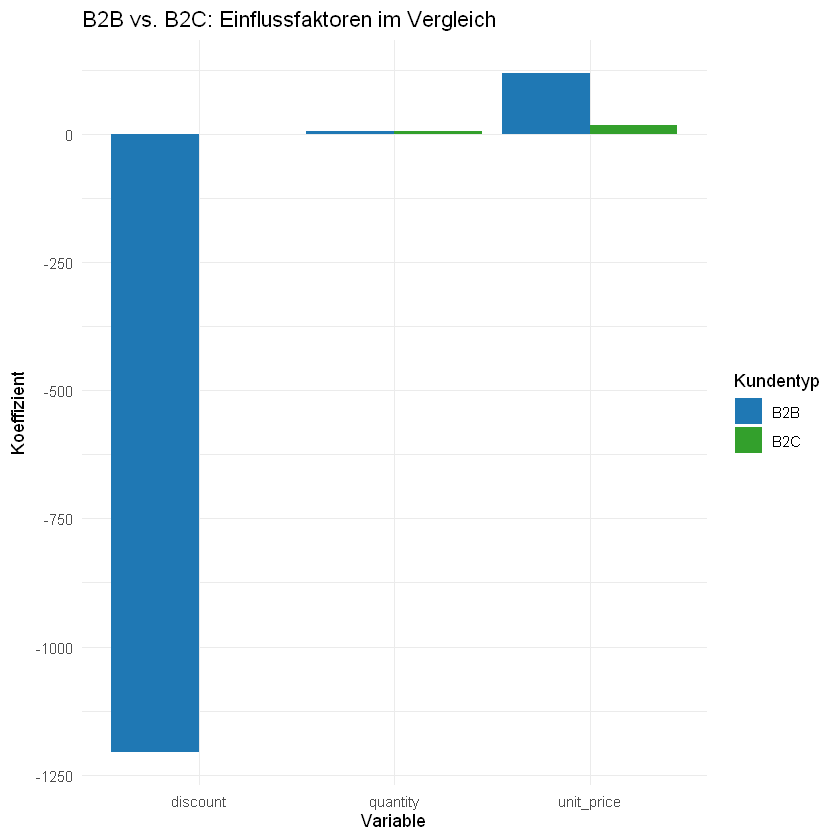

In [ ]:
# Koeffizienten für B2B
coef_b2b <- tidy(model_b2b) %>% 
  mutate(group = "B2B")

# Koeffizienten für B2C
coef_b2c <- tidy(model_b2c) %>% 
  mutate(group = "B2C")

# Kombinieren
combined_coef <- bind_rows(coef_b2b, coef_b2c)

# Für B2B
coef_b2b <- data.frame(
  term = names(coef(model_b2b)),
  estimate = coef(model_b2b),
  group = "B2B"
)

# Für B2C
coef_b2c <- data.frame(
  term = names(coef(model_b2c)),
  estimate = coef(model_b2c),
  group = "B2C"
)

# Kombinieren
combined_coef <- bind_rows(coef_b2b, coef_b2c)

ggplot(combined_coef %>% 
         filter(term %in% c("quantity", "discount", "unit_price")), 
       aes(x = term, y = estimate, fill = group)) +
  geom_col(position = "dodge") +  # Verwenden Sie geom_col() statt geom_bar(stat = "identity")
  labs(
    title = "B2B vs. B2C: Einflussfaktoren im Vergleich",
    x = "Variable",
    y = "Koeffizient",
    fill = "Kundentyp"
  ) +
  theme_minimal() +
  scale_fill_manual(values = c("B2B" = "#1f78b4", "B2C" = "#33a02c"))  # Farben anpassen

Interpretation der Regressionsergebnisse (B2B vs. B2C)
Hier sind die zentralen Erkenntnisse und ihre geschäftliche Bedeutung:

1. Haupteffekte
Variable	Koeffizient	Interpretation
quantity	+5.55	Jede zusätzliche Einheit steigert den Umsatz um €5.55 (Basis: B2B).
discount	–1,205	Ein 1%-Punkt Rabatt reduziert den Umsatz um €1,205 (Basis: B2B).
unit_price	+118.40	Eine €1 Preiserhöhung steigert den Umsatz um €118.40 (Basis: B2B).
customer_typeB2C	+458.80	B2C-Rechnungen haben €458.80 höhere Umsätze als B2B (ohne andere Faktoren).
2. Interaktionseffekte
Interaktion	Koeffizient	Bedeutung
quantity:customer_typeB2C	+0.39	Bei B2C steigt der Umsatz pro Einheit um zusätzliche €0.39 (vs. B2B).
unit_price:customer_typeB2C	–100.90	Bei B2C reduziert eine €1 Preiserhöhung den Umsatz um €100.90 (vs. B2B).
discount:customer_typeB2C	NA	Fehlender Effekt (mögliche Kollinearität oder fehlende Daten).
3. Regionale Unterschiede
Signifikant negative Effekte:

Bremen: –€12.54 vs. Referenzregion (Baden-Württemberg).

Nordrhein-Westfalen: –€3.79.

Sachsen-Anhalt: –€4.29.

Andere Regionen: Kein signifikanter Unterschied.

4. Modellgüte
R² = 0.694: Das Modell erklärt 69.4% der Umsatzvarianz – sehr stark.

RMSE = €525.70: Durchschnittliche Prognoseabweichung von €525.70 pro Rechnung.

Business-Implikationen
Preisstrategie:

B2B: Preiserhöhungen sind hochwirksam (+€118.40 pro €1).

B2C: Preiserhöhungen senken den Umsatz (–€100.90 pro €1)!
→ B2C: Preise stabil halten, B2B: Preispolitik als Hebel nutzen.

Rabattgestaltung:

Rabatte vermeiden: Ein 2%-Rabatt kostet €2,410 pro Rechnung (B2B).

Ausnahme B2C: Da der Rabatt-Interaktionsterm fehlt, könnte dies auf fehlende Rabattdaten hinweisen – prüfen!

Mengenförderung:

B2C profitiert stärker von Mengen: +€5.94 pro Einheit (5.55 + 0.39).
→ Bündelangebote (z.B. "3 zum Preis von 2") für B2C einführen.

Regionale Fokussierung:

Bremen/NRW/Sachsen-Anhalt: Gezielte Kampagnen zur Umsatzsteigerung.

Bayern/Hamburg: Kein Handlungsbedarf (keine signifikanten Unterschiede).

Auffälligkeiten & nächste Schritte
Fehlender Rabatt-Interaktionsterm (B2C):

Mögliche Ursachen:

Multikollinearität: Rabatte sind bei B2C konstant (z.B. immer 0%).

Datenlücken: Keine ausreichenden Rabattdaten für B2C.
→ Prüfen: table(combined_data$discount[combined_data$customer_type == "B2C"]).

Starker B2C-Basiseffekt:

B2C-Rechnungen sind im Schnitt €458.80 teurer – möglicherweise wegen höherer Einzelhandelspreise.
→ Prüfen: Unterschiede in Produktkategorien oder Margen analysieren.

Zusammenfassung
B2B: Preiserhöhungen und Mengensteigerung sind effektiv.

B2C: Mengen ausbauen, Preise stabil halten.

Rabatte: Sparsam einsetzen (besonders bei B2B).

Regionen: Fokus auf Bremen, NRW und Sachsen-Anhalt.

Mit diesen Erkenntnissen können Sie zielgerichtete Strategien für beide Kundengruppen entwickeln! 🚀